In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
users = pd.read_csv('datasets/Users.csv')
destinations = pd.read_csv('datasets/Destinations.csv')
user_history = pd.read_csv('datasets/Userhistory.csv')
reviews = pd.read_csv('datasets/Review.csv')

In [3]:
users.head()

,UserID,Name,Age,Gender,Email,Location,TravelPreferences,Number of Adults,Number of Children
0,1,Sanjay Verma,20,Male,sanjay.verma701@gmail.com,Karnataka,Adventure,1,3
1,2,Asha Gupta,49,Female,asha.gupta935@gmail.com,Karnataka,Historical,2,2
2,3,Ankit Reddy,28,Male,ankit.reddy252@gmail.com,Karnataka,Wildlife,1,2
3,4,Ankit Nair,46,Male,ankit.nair996@gmail.com,Rajasthan,Wildlife,2,1
4,5,Arun Reddy,29,Male,arun.reddy496@gmail.com,Goa,Nature,2,1


In [4]:
destinations.head()

,DestinationID,Name,District,State,Category,BestTimeToVisit,PopularityScore,Description
0,1,Tirupati Balaji Temple,Tirupati,Andhra Pradesh,Religious,October - March,9.5,One of the most visited religious sites in the...
1,2,Araku Valley,Visakhapatnam,Andhra Pradesh,Hill Station,October - March,8.7,"Nestled in the Eastern Ghats, Araku Valley is ..."
2,3,Borra Caves,Visakhapatnam,Andhra Pradesh,Nature,October - March,8.5,"Located in the Ananthagiri Hills, Borra Caves ..."
3,4,Srisailam Temple,Kurnool,Andhra Pradesh,Religious,October - February,9.0,"Situated on the banks of the Krishna River, Sr..."
4,5,Gandikota,Kadapa,Andhra Pradesh,Historical,October - March,8.6,"Often referred to as the ""Grand Canyon of Indi..."


In [5]:
user_history.head()

,HistoryID,UserID,DestinationID,VisitDate
0,1,1,39,24-06-2020
1,2,2,582,10-03-2021
2,3,3,57,11-04-2020
3,4,4,543,21-04-2024
4,5,5,304,11-02-2020


In [6]:
reviews.head()

,ReviewID,DestinationID,UserID,Rating
0,1,39,1,4
1,2,582,2,1
2,3,57,3,3
3,4,543,4,5
4,5,304,5,2


In [7]:
# Merge datasets
merged_data = pd.merge(user_history, reviews, on=['DestinationID', 'UserID'], how='left')
merged_data = pd.merge(merged_data, users, on='UserID', how='left')
merged_data = pd.merge(merged_data, destinations, on='DestinationID', how='left')

In [8]:
merged_data.head()

,HistoryID,UserID,DestinationID,VisitDate,ReviewID,Rating,Name_x,Age,Gender,Email,...,TravelPreferences,Number of Adults,Number of Children,Name_y,District,State,Category,BestTimeToVisit,PopularityScore,Description
0,1,1,39,24-06-2020,1,4,Sanjay Verma,20,Male,sanjay.verma701@gmail.com,...,Adventure,1,3,Gori Chen Peak,Tawang,Arunachal Pradesh,Adventure,May - September,8.1,Gori Chen Peak is a challenging trekking desti...
1,2,2,582,10-03-2021,2,1,Asha Gupta,49,Female,asha.gupta935@gmail.com,...,Historical,2,2,Kotumsar Caves,Bastar,Chhattisgarh,Historical,October-March,7.8,Kotumsar Caves are ancient rock-cut caves know...
2,3,3,57,11-04-2020,3,3,Ankit Reddy,28,Male,ankit.reddy252@gmail.com,...,Wildlife,1,2,Orang National Park,Darrang,Assam,Wildlife,November - April,8.1,Orang National Park is a rich biodiversity hot...
3,4,4,543,21-04-2024,4,5,Ankit Nair,46,Male,ankit.nair996@gmail.com,...,Wildlife,2,1,Mahatma Gandhi Marine National Park,South Andaman,Andaman & Nicobar Islands,Wildlife,November-February,9.1,Mahatma Gandhi Marine National Park is a rich ...
4,5,5,304,11-02-2020,5,2,Arun Reddy,29,Male,arun.reddy496@gmail.com,...,Nature,2,1,Thalon Cave,Tamenglong,Manipur,Nature,October-March,7.2,Thalon Cave is an ancient cave known for its r...


In [9]:
merged_data.shape

(2000, 21)

In [10]:
merged_data.isnull().sum()

HistoryID             0
UserID                0
DestinationID         0
VisitDate             0
ReviewID              0
Rating                0
Name_x                0
Age                   0
Gender                0
Email                 0
Location              0
TravelPreferences     0
Number of Adults      0
Number of Children    0
Name_y                0
District              0
State                 0
Category              0
BestTimeToVisit       0
PopularityScore       0
Description           0
dtype: int64

In [11]:
merged_data.duplicated().sum()

np.int64(0)

In [12]:
merged_data.describe()

,HistoryID,UserID,DestinationID,ReviewID,Rating,Age,Number of Adults,Number of Children,PopularityScore
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,1000.500000,341.757000,1000.500000,2.957500,41.821000,2.521000,1.515500,8.354300
std,577.494589,577.494589,189.102379,577.494589,1.413398,13.987451,1.106423,1.115967,0.605776
min,1.000000,1.000000,2.000000,1.000000,1.000000,18.000000,1.000000,0.000000,6.700000
25%,500.750000,500.750000,170.000000,500.750000,2.000000,29.750000,2.000000,1.000000,8.000000
50%,1000.500000,1000.500000,334.000000,1000.500000,3.000000,42.000000,3.000000,2.000000,8.400000
75%,1500.250000,1500.250000,516.000000,1500.250000,4.000000,54.000000,3.000000,3.000000,8.800000
max,2000.000000,2000.000000,659.000000,2000.000000,5.000000,65.000000,4.000000,3.000000,9.700000


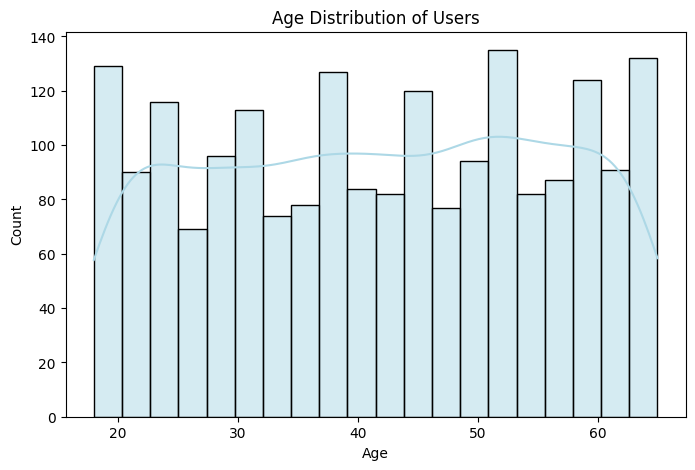

In [13]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['Age'], bins=20, kde=True, color='lightblue')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

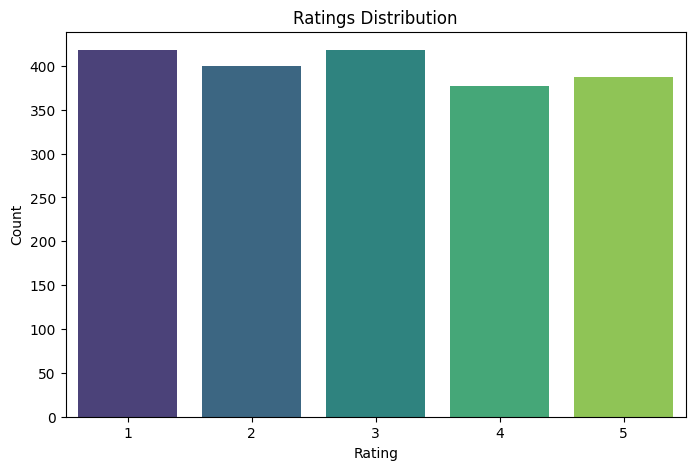

In [14]:
# Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=merged_data['Rating'], palette='viridis')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

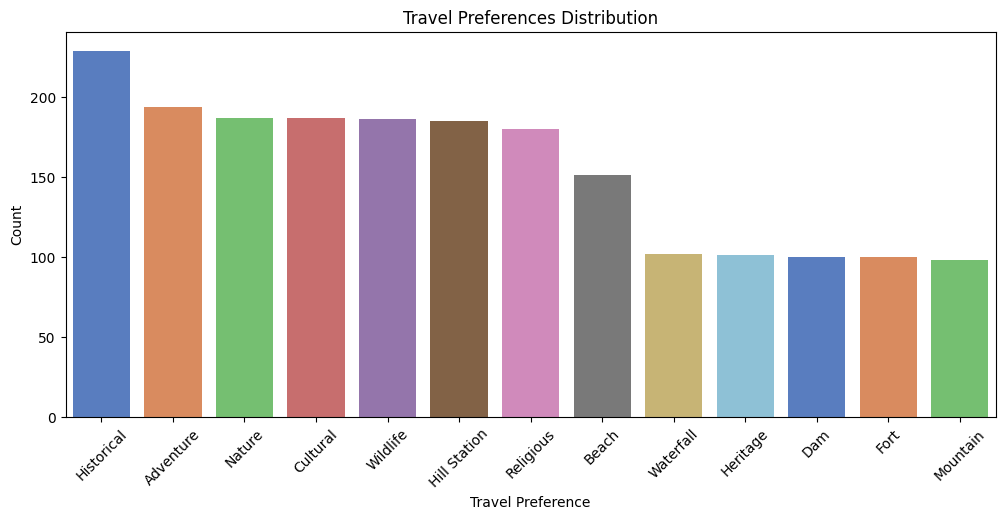

In [15]:
# Travel Preferences Distribution
plt.figure(figsize=(12, 5))
travel_prefs = merged_data['TravelPreferences'].value_counts()
sns.barplot(x=travel_prefs.index, y=travel_prefs.values, palette='muted')
plt.xticks(rotation=45)
plt.title("Travel Preferences Distribution")
plt.xlabel("Travel Preference")
plt.ylabel("Count")
plt.show()

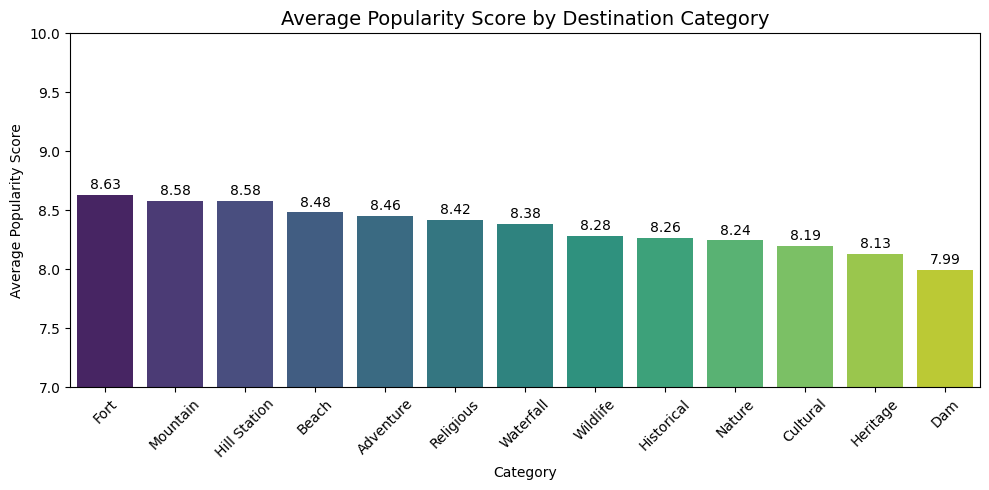

In [16]:
# Popularity of Different Destination Categories
plt.figure(figsize=(10, 5))
category_popularity = merged_data.groupby('Category')['PopularityScore'].mean().sort_values(ascending=False).reset_index()
bars = sns.barplot(x='Category', y='PopularityScore', data=category_popularity, palette='viridis')
plt.title('Average Popularity Score by Destination Category', fontsize=14)
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.ylim(7, 10)

for i, v in enumerate(category_popularity['PopularityScore']):
    bars.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

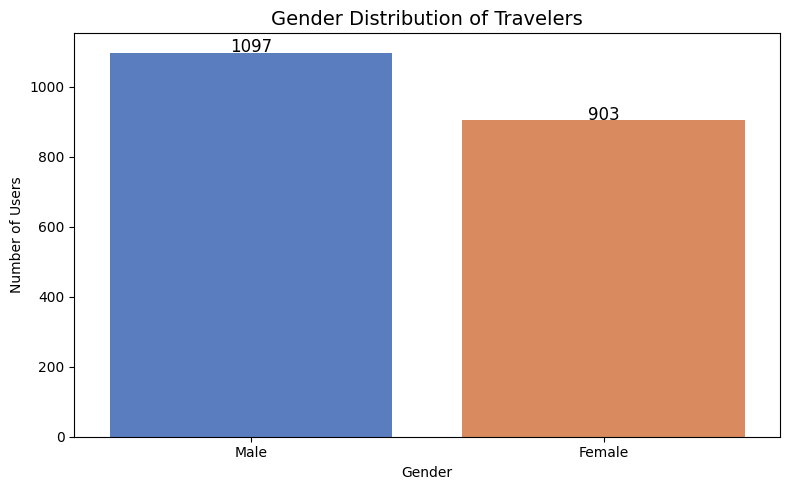

In [17]:
plt.figure(figsize=(8, 5))
gender_count = merged_data['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

bars = sns.barplot(x='Gender', y='Count', data=gender_count, palette='muted')
plt.title('Gender Distribution of Travelers', fontsize=14)
plt.ylabel('Number of Users')
plt.xlabel('Gender')

for i, v in enumerate(gender_count['Count']):
    bars.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()